In [2]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as logr
from sklearn.model_selection import cross_val_score, LeaveOneOut, RepeatedKFold
from sklearn.metrics import mean_squared_error, roc_curve, auc, f1_score 

from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

        
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
import warnings

# Ignore DeprecationWarning and FutureWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [12]:
cbb = pd.read_csv("/Users/jaredmaksoud/Downloads/DATA221Final/cbb.csv")
cbb

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,27.5,54.6,52.1,39.7,36.1,69.5,-1.2,NaN,NaN,2023
3519,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,27.8,56.4,48.6,36.4,33.6,64.4,-2.0,NaN,NaN,2023
3520,Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,...,28.7,52.5,42.8,33.4,31.1,69.8,-0.3,NaN,NaN,2023
3521,UAB,CUSA,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,...,28.9,48.8,47.2,35.6,31.6,70.7,-0.5,NaN,NaN,2023


In [13]:
sweet16_cbb = cbb.loc[((cbb['POSTSEASON'] == 'S16') | (cbb['POSTSEASON'] == 'E8') | (cbb['POSTSEASON'] == 'F4') | (cbb['POSTSEASON'] == 'Champions') | (cbb['POSTSEASON'] == '2ND'))]
sweet16_cbb

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,Creighton,BE,37,24,115.0,93.2,0.9177,54.2,47.1,16.6,...,19.7,55.1,45.7,35.4,33.6,67.7,2.2,E8,6.0,2023
3187,Michigan St.,B10,34,21,114.4,96.4,0.8771,51.7,48.6,16.4,...,28.0,48.2,48.7,39.3,32.4,64.6,2.4,S16,7.0,2023
3191,Arkansas,SEC,36,22,111.9,93.3,0.8894,50.9,47.2,18.1,...,39.5,52.5,47.4,31.3,31.1,69.5,0.4,S16,8.0,2023
3192,Florida Atlantic,CUSA,37,35,114.0,95.8,0.8815,54.3,46.1,16.9,...,26.3,53.8,44.7,36.6,32.4,67.5,4.7,F4,9.0,2023


In [14]:
non16_cbb = cbb.drop(cbb[cbb.isin(sweet16_cbb)].dropna().index).drop(columns = ['POSTSEASON', 'SEED'])
non16_cbb

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,YEAR
56,Duquesne,A10,30,11,107.0,111.7,0.3790,51.2,51.7,18.3,...,33.3,32.5,33.8,49.5,47.7,36.2,38.5,67.6,-11.3,2015
57,Fordham,A10,30,9,101.0,103.0,0.4450,46.7,50.2,22.2,...,29.5,33.1,41.7,47.8,49.6,29.8,34.1,65.9,-12.3,2015
58,George Mason,A10,30,8,101.2,103.8,0.4276,45.5,50.0,21.9,...,30.4,41.1,44.7,44.9,48.4,31.6,35.3,65.0,-12.6,2015
59,George Washington,A10,35,22,107.2,96.2,0.7755,48.9,45.9,18.7,...,30.9,39.9,28.9,47.3,44.9,35.2,31.9,62.7,-2.3,2015
60,La Salle,A10,33,17,98.9,92.9,0.6734,46.7,45.8,19.9,...,30.8,36.4,34.4,46.1,45.1,32.1,31.6,64.8,-6.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,30.9,34.4,27.5,54.6,52.1,39.7,36.1,69.5,-1.2,2023
3519,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,20.2,26.2,27.8,56.4,48.6,36.4,33.6,64.4,-2.0,2023
3520,Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,...,29.1,35.6,28.7,52.5,42.8,33.4,31.1,69.8,-0.3,2023
3521,UAB,CUSA,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,...,29.3,35.7,28.9,48.8,47.2,35.6,31.6,70.7,-0.5,2023


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/mj/l0ltx7wx3md22z2ps917d6wm0000gn/T/ipykernel_44163/1958679573.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


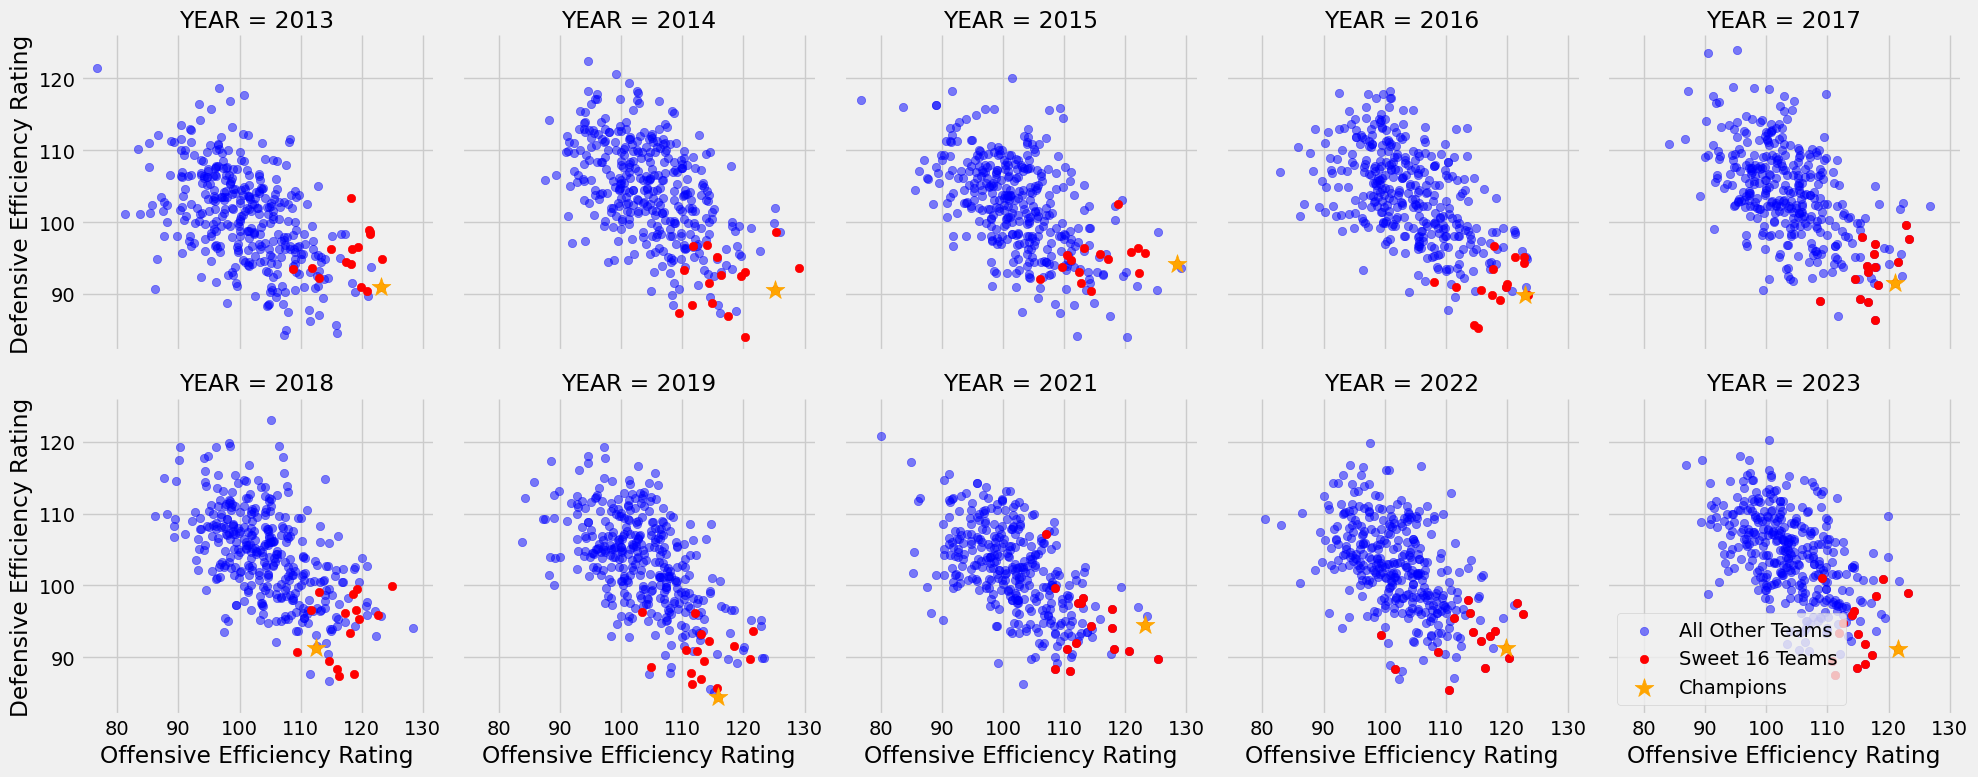

In [15]:
grid = sns.FacetGrid(cbb, col='YEAR', col_wrap=5, height=4)
grid.map(plt.scatter, 'ADJOE', 'ADJDE', alpha=0.5, color='blue', label='All Other Teams')

for ax, year in zip(grid.axes.flatten(), cbb['YEAR'].unique()):
    sweet_16_year = sweet16_cbb[sweet16_cbb['YEAR'] == year]
    champion_year = cbb[(cbb['YEAR'] == year) & (cbb['POSTSEASON'] == 'Champions')]
    ax.scatter(sweet_16_year['ADJOE'], sweet_16_year['ADJDE'], color='red', marker='o', label = 'Sweet 16 Teams')
    ax.scatter(champion_year['ADJOE'], champion_year['ADJDE'], color='orange', marker='*', s=200, label='Champions')

    ax.set_xlabel('Offensive Efficiency Rating')
    ax.set_ylabel('Defensive Efficiency Rating')

plt.legend()
plt.tight_layout()
plt.show()

In [16]:
cbb['win_eff'] = cbb['ADJOE'] / cbb['ADJDE']
cbb_win = cbb.fillna(0).drop(columns = ['ADJOE', 'ADJDE'])
cbb_win

,TEAM,CONF,G,W,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,win_eff
0,North Carolina,ACC,40,33,0.9531,52.6,48.1,15.4,18.2,40.7,...,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,1.299262
1,Wisconsin,B10,40,36,0.9758,54.8,47.7,12.4,15.8,32.1,...,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015,1.379274
2,Michigan,B10,40,33,0.9375,53.9,47.7,14.0,19.5,25.5,...,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018,1.265487
3,Texas Tech,B12,38,31,0.9696,53.5,43.0,17.7,22.8,27.4,...,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019,1.352113
4,Gonzaga,WCC,39,37,0.9728,56.6,41.1,16.2,17.1,30.0,...,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017,1.365006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Toledo,MAC,34,27,0.7369,56.3,52.9,13.6,18.3,29.8,...,54.6,52.1,39.7,36.1,69.5,-1.2,0,0.0,2023,1.093978
3519,Liberty,ASun,33,27,0.8246,55.5,49.3,16.0,18.9,25.3,...,56.4,48.6,36.4,33.6,64.4,-2.0,0,0.0,2023,1.144913
3520,Utah Valley,WAC,34,28,0.8065,51.7,44.0,19.3,16.3,28.9,...,52.5,42.8,33.4,31.1,69.8,-0.3,0,0.0,2023,1.132135
3521,UAB,CUSA,38,29,0.8453,50.3,47.3,17.3,19.3,35.8,...,48.8,47.2,35.6,31.6,70.7,-0.5,0,0.0,2023,1.158763


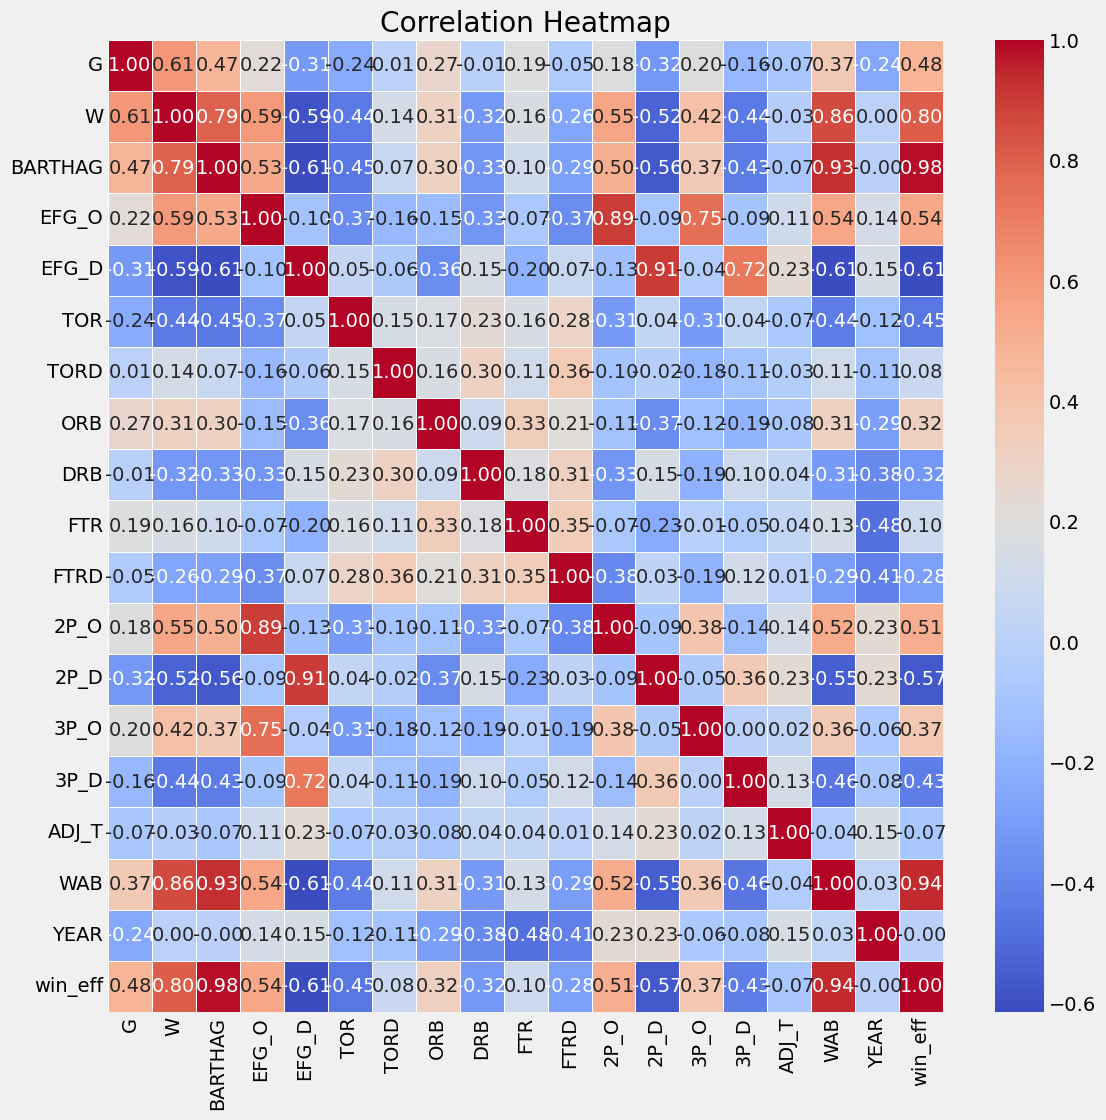

In [17]:
cbb1 = cbb.drop(['TEAM', 'CONF', 'POSTSEASON', 'SEED', 'ADJOE', 'ADJDE'], axis=1)
co_mat = cbb1.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(co_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [18]:
numerical_columns = ['G', 'W', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD',
       'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T',
       'WAB', 'win_eff']

In [19]:
cbb_win_numerical = cbb_win.drop(columns = ['TEAM', 'CONF', 'POSTSEASON', 'SEED', 'YEAR'])
scaler = StandardScaler()
numbers = scaler.fit_transform(cbb_win_numerical)
cbb_win_num_stand = pd.DataFrame(numbers, columns = numerical_columns)
cbb_win_num_stand

,G,W,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,win_eff
0,2.407925,2.588173,1.798002,0.881130,-0.686500,-1.566916,-0.189710,2.703540,0.149413,-0.404294,-0.688346,1.408147,-1.413912,-0.544408,0.751759,1.282537,2.374116,2.484197
1,2.407925,3.044657,1.886916,1.595864,-0.824691,-2.992893,-1.260781,0.662498,-1.798428,0.303063,-1.939157,1.672860,-1.383761,0.848146,1.285596,-2.728767,2.770300,3.162590
2,2.407925,2.588173,1.736898,1.303473,-0.824691,-2.232372,0.390453,-0.903884,-1.427411,-0.694492,-0.750886,1.643447,-0.750571,0.371746,-0.480172,-0.593718,2.124666,2.197822
3,1.901727,2.283849,1.862631,1.173521,-2.448428,-0.473666,1.863175,-0.452956,-0.252523,-0.295470,0.281033,1.084609,-2.228014,0.848146,-1.917426,-0.076130,2.139340,2.932300
4,2.154826,3.196819,1.875165,2.180646,-3.104833,-1.186655,-0.680617,0.164104,-1.025475,0.810909,-1.235576,2.114049,-2.800900,1.471131,-2.204877,1.217839,2.242054,3.041618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,0.889331,1.675203,0.951161,2.083183,0.971785,-2.422502,-0.145082,0.116638,0.427676,-0.023409,-1.141765,1.614035,0.847480,2.020823,0.710695,0.570854,0.936113,0.743645
3519,0.636232,1.675203,1.294676,1.823279,-0.271929,-1.281720,0.122686,-0.951350,-2.880562,-1.510673,-1.094859,2.143461,-0.207837,0.811500,-0.315915,-1.078956,0.818725,1.175506
3520,0.889331,1.827365,1.223779,0.588739,-2.102952,0.286855,-1.037641,-0.096960,-0.128850,0.194239,-0.954143,0.996371,-1.956647,-0.287885,-1.342525,0.667902,1.068175,1.067170
3521,1.901727,1.979526,1.375756,0.133908,-0.962881,-0.663797,0.301197,1.540621,-0.067014,0.212377,-0.922873,-0.091894,-0.629963,0.518330,-1.137203,0.959045,1.038828,1.292938


In [20]:
cbb_win_num_stand['Postseason'] = cbb_win.POSTSEASON
cbb_win_stand = cbb_win_num_stand
cbb_win_stand.head(5)

,G,W,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,win_eff,Postseason
0,2.407925,2.588173,1.798002,0.881130,-0.686500,-1.566916,-0.189710,2.703540,0.149413,-0.404294,-0.688346,1.408147,-1.413912,-0.544408,0.751759,1.282537,2.374116,2.484197,2ND
1,2.407925,3.044657,1.886916,1.595864,-0.824691,-2.992893,-1.260781,0.662498,-1.798428,0.303063,-1.939157,1.672860,-1.383761,0.848146,1.285596,-2.728767,2.770300,3.162590,2ND
2,2.407925,2.588173,1.736898,1.303473,-0.824691,-2.232372,0.390453,-0.903884,-1.427411,-0.694492,-0.750886,1.643447,-0.750571,0.371746,-0.480172,-0.593718,2.124666,2.197822,2ND
3,1.901727,2.283849,1.862631,1.173521,-2.448428,-0.473666,1.863175,-0.452956,-0.252523,-0.295470,0.281033,1.084609,-2.228014,0.848146,-1.917426,-0.076130,2.139340,2.932300,2ND
4,2.154826,3.196819,1.875165,2.180646,-3.104833,-1.186655,-0.680617,0.164104,-1.025475,0.810909,-1.235576,2.114049,-2.800900,1.471131,-2.204877,1.217839,2.242054,3.041618,2ND


In [21]:
postseason_mapping = {
    0: 0,    
    'R68': 1,
    'R64': 1,
    'R32': 2,
    'S16': 2,
    'E8': 3,
    'F4': 3,
    '2ND': 4,
    'Champions': 4
}

cbb_win_stand['group'] = cbb_win_stand['Postseason'].map(postseason_mapping).astype(float)


In [22]:
final_df = cbb_win_stand.drop(columns = 'Postseason')
final_df

,G,W,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,win_eff,group
0,2.407925,2.588173,1.798002,0.881130,-0.686500,-1.566916,-0.189710,2.703540,0.149413,-0.404294,-0.688346,1.408147,-1.413912,-0.544408,0.751759,1.282537,2.374116,2.484197,4.0
1,2.407925,3.044657,1.886916,1.595864,-0.824691,-2.992893,-1.260781,0.662498,-1.798428,0.303063,-1.939157,1.672860,-1.383761,0.848146,1.285596,-2.728767,2.770300,3.162590,4.0
2,2.407925,2.588173,1.736898,1.303473,-0.824691,-2.232372,0.390453,-0.903884,-1.427411,-0.694492,-0.750886,1.643447,-0.750571,0.371746,-0.480172,-0.593718,2.124666,2.197822,4.0
3,1.901727,2.283849,1.862631,1.173521,-2.448428,-0.473666,1.863175,-0.452956,-0.252523,-0.295470,0.281033,1.084609,-2.228014,0.848146,-1.917426,-0.076130,2.139340,2.932300,4.0
4,2.154826,3.196819,1.875165,2.180646,-3.104833,-1.186655,-0.680617,0.164104,-1.025475,0.810909,-1.235576,2.114049,-2.800900,1.471131,-2.204877,1.217839,2.242054,3.041618,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,0.889331,1.675203,0.951161,2.083183,0.971785,-2.422502,-0.145082,0.116638,0.427676,-0.023409,-1.141765,1.614035,0.847480,2.020823,0.710695,0.570854,0.936113,0.743645,0.0
3519,0.636232,1.675203,1.294676,1.823279,-0.271929,-1.281720,0.122686,-0.951350,-2.880562,-1.510673,-1.094859,2.143461,-0.207837,0.811500,-0.315915,-1.078956,0.818725,1.175506,0.0
3520,0.889331,1.827365,1.223779,0.588739,-2.102952,0.286855,-1.037641,-0.096960,-0.128850,0.194239,-0.954143,0.996371,-1.956647,-0.287885,-1.342525,0.667902,1.068175,1.067170,0.0
3521,1.901727,1.979526,1.375756,0.133908,-0.962881,-0.663797,0.301197,1.540621,-0.067014,0.212377,-0.922873,-0.091894,-0.629963,0.518330,-1.137203,0.959045,1.038828,1.292938,0.0


# ALL TEAMS

In [23]:
X = final_df.drop(columns=['group'])
y = final_df['group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier as rnd_frst
from sklearn.model_selection import cross_val_score, LeaveOneOut, RepeatedKFold
from sklearn.metrics import mean_squared_error, roc_curve, auc, f1_score  

In [25]:
model = rnd_frst(max_depth=5) # smaller trees 
k_folds = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, y_train, 
                     scoring='f1',
                     cv=k_folds, n_jobs=None) # use one processor to succesfully suppress warnings 
print('Mean F1 score=%.2f'%np.abs(scores).mean())


##########################################
# Train the model / fit model parameters #
#       and test on testing dataset      #
##########################################

model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_hat = model.predict(X_test)
print('F1 score for the *training* dataset = %.3f'%f1_score(y_train, y_train_hat, average = 'weighted'))
print('F1 score for the *testing* dataset = %.3f'%f1_score(y_test, y_hat, average = 'weighted'))



/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1269, in f1_score
    return fbeta

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1269, in f1_score
    return fbeta

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1269, in f1_score
    return fbeta

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1269, in f1_score
    return fbeta

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1269, in f1_score
    return fbeta

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1269, in f1_score
    return fbeta

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1269, in f1_score
    return fbeta

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1269, in f1_score
    return fbeta

Mean F1 score=nan
F1 score for the *training* dataset = 0.892
F1 score for the *testing* dataset = 0.856


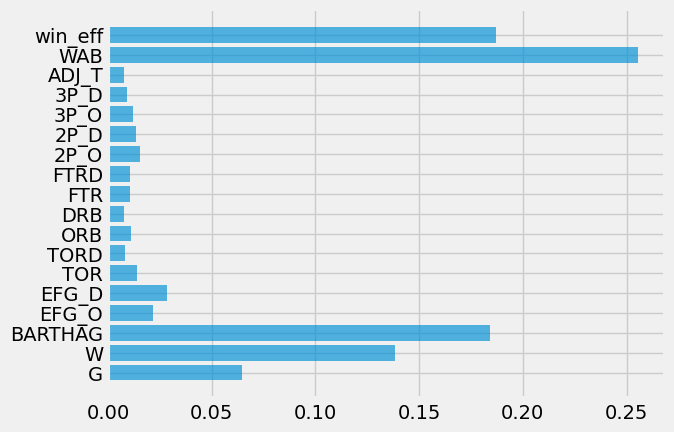

In [26]:
plt.barh(X.columns, model.feature_importances_, alpha=0.67);

In [27]:
from sklearn.model_selection import RandomizedSearchCV
# In contrast to GridSearchCV, not all parameter values are tried out, 
# but rather a fixed number of parameter settings is sampled from the 
# specified distributions. The number of parameter settings that are 
# tried is given by n_iter. 
#
# There are additional Hyper-parameter optimizers in 
# sklearn.model_selection

# Create a random forest classifier and a list of parameters to tweak
rf = rnd_frst()
param_dist = {'n_estimators': np.random.randint(50,500,4),
              'max_depth': np.random.randint(1,20,5)}

# Use random search to find the 'best' hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=10, 
                                 cv=5) # create random search object

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([17, 17, 18, 12, 18]),
                                        'n_estimators': array([ 92, 309,  88, 378])})

In [28]:
# Create an instance of the best model
best_rf = rand_search.best_estimator_ 

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 88, 'max_depth': 12}


F1 score for the *training* dataset = 0.998
F1 score for the *testing* dataset = 0.863




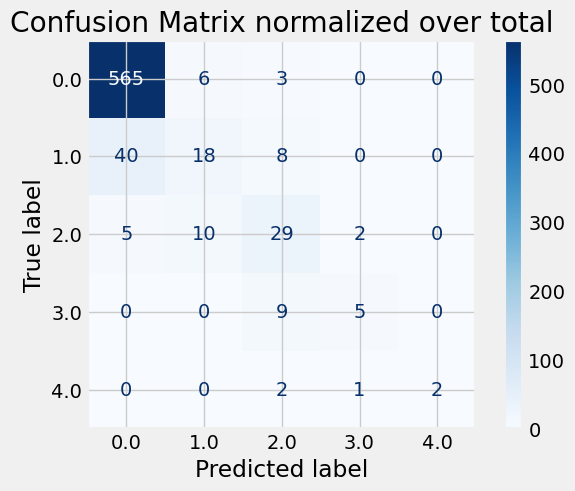

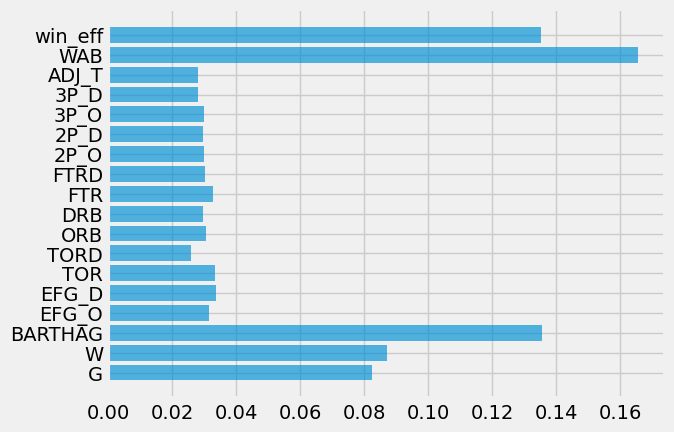

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score    

# Generate predictions with the best model
y_hat = best_rf.predict(X_test)
y_train_hat = best_rf.predict(X_train)
print('F1 score for the *training* dataset = %.3f'%f1_score(y_train, y_train_hat, average = 'weighted'))
print('F1 score for the *testing* dataset = %.3f\n\n'%f1_score(y_test, y_hat, average = 'weighted'))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay.from_predictions(
     y_test,
     y_hat, 
     cmap=plt.cm.Blues,
     normalize=None # 'all', # Normalized by the total number of samples 
    )
disp.ax_.set_title('Confusion Matrix normalized over total');

# Also plot fearure importances 
plt.figure()
plt.barh(X.columns, best_rf.feature_importances_, alpha=0.67);


In [30]:
from sklearn.metrics import classification_report

y_pred = best_rf.predict(X_test)

print('F1 score for the *training* dataset = %.3f'%f1_score(y_train, y_train_hat, average = 'weighted'))
print('F1 score for the *testing* dataset = %.3f\n\n'%f1_score(y_test, y_hat, average = 'weighted'))
print(classification_report(y_test, y_pred))

F1 score for the *training* dataset = 0.998
F1 score for the *testing* dataset = 0.863


              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       574
         1.0       0.53      0.27      0.36        66
         2.0       0.57      0.63      0.60        46
         3.0       0.62      0.36      0.45        14
         4.0       1.00      0.40      0.57         5

    accuracy                           0.88       705
   macro avg       0.73      0.53      0.59       705
weighted avg       0.86      0.88      0.86       705



## TOURNAMENT TEAMS ONLY  

In [31]:
final_tourney = final_df.loc[final_df.group != 0]
final_tourney
X = final_tourney.drop(columns = ['group', 'BARTHAG', 'WAB'])
Y = final_tourney.group
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
model = rnd_frst(max_depth=5) # smaller trees 
k_folds = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, y_train, 
                     scoring='f1',
                     cv=k_folds, n_jobs=None) # use one processor to succesfully suppress warnings 
print('Mean F1 score=%.2f'%np.abs(scores).mean())


##########################################
# Train the model / fit model parameters #
#       and test on testing dataset      #
##########################################

model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_hat = model.predict(X_test)
print('F1 score for the *training* dataset = %.3f'%f1_score(y_train, y_train_hat, average = 'weighted'))
print('F1 score for the *testing* dataset = %.3f'%f1_score(y_test, y_hat, average = 'weighted'))



/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1269, in f1_score
    return fbeta

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1269, in f1_score
    return fbeta

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1269, in f1_score
    return fbeta

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1269, in f1_score
    return fbeta

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1269, in f1_score
    return fbeta

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1269, in f1_score
    return fbeta

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1269, in f1_score
    return fbeta

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py", line 1269, in f1_score
    return fbeta

Mean F1 score=nan
F1 score for the *training* dataset = 0.827
F1 score for the *testing* dataset = 0.652


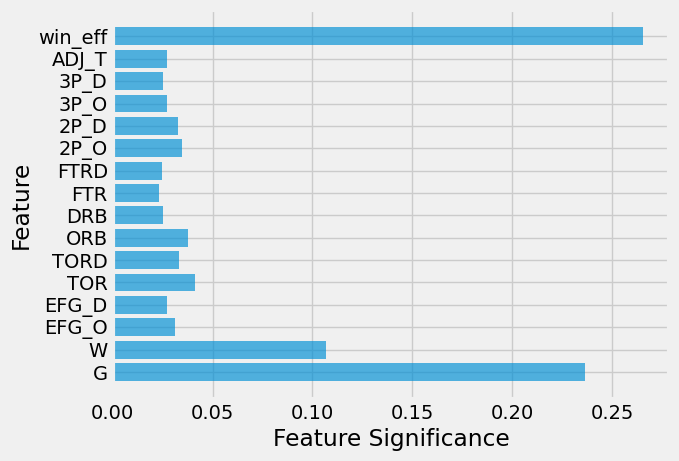

In [33]:
plt.barh(X.columns, model.feature_importances_, alpha=0.67)
plt.xlabel('Feature Significance')
plt.ylabel('Feature');

In [34]:
rf = rnd_frst()
param_dist = {'n_estimators': np.random.randint(50,500,4),
              'max_depth': np.random.randint(1,20,5)}

# Use random search to find the 'best' hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=10, 
                                 cv=5) # create random search object

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([19, 19,  5, 13, 16]),
                                        'n_estimators': array([364, 369, 392, 326])})

In [35]:
# Create an instance of the best model
best_rf = rand_search.best_estimator_ 

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 392, 'max_depth': 5}


F1 score for the *training* dataset = 0.841
F1 score for the *testing* dataset = 0.686




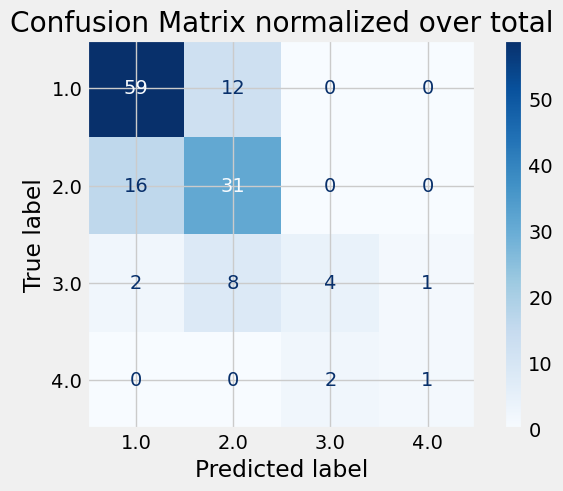

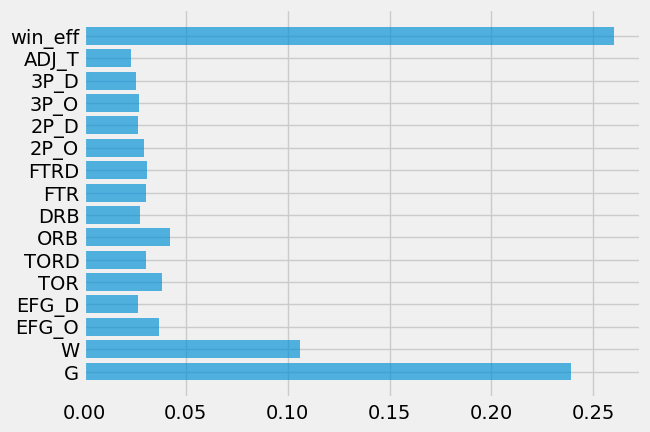

In [36]:
y_hat = best_rf.predict(X_test)
y_train_hat = best_rf.predict(X_train)
print('F1 score for the *training* dataset = %.3f'%f1_score(y_train, y_train_hat, average = 'weighted'))
print('F1 score for the *testing* dataset = %.3f\n\n'%f1_score(y_test, y_hat, average = 'weighted'))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay.from_predictions(
     y_test,
     y_hat, 
     cmap=plt.cm.Blues,
     normalize=None # 'all', # Normalized by the total number of samples 
    )
disp.ax_.set_title('Confusion Matrix normalized over total');

# Also plot fearure importances 
plt.figure()
plt.barh(X.columns, best_rf.feature_importances_, alpha=0.67);


In [39]:
final_df

,G,W,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,win_eff,group
0,2.407925,2.588173,1.798002,0.881130,-0.686500,-1.566916,-0.189710,2.703540,0.149413,-0.404294,-0.688346,1.408147,-1.413912,-0.544408,0.751759,1.282537,2.374116,2.484197,4.0
1,2.407925,3.044657,1.886916,1.595864,-0.824691,-2.992893,-1.260781,0.662498,-1.798428,0.303063,-1.939157,1.672860,-1.383761,0.848146,1.285596,-2.728767,2.770300,3.162590,4.0
2,2.407925,2.588173,1.736898,1.303473,-0.824691,-2.232372,0.390453,-0.903884,-1.427411,-0.694492,-0.750886,1.643447,-0.750571,0.371746,-0.480172,-0.593718,2.124666,2.197822,4.0
3,1.901727,2.283849,1.862631,1.173521,-2.448428,-0.473666,1.863175,-0.452956,-0.252523,-0.295470,0.281033,1.084609,-2.228014,0.848146,-1.917426,-0.076130,2.139340,2.932300,4.0
4,2.154826,3.196819,1.875165,2.180646,-3.104833,-1.186655,-0.680617,0.164104,-1.025475,0.810909,-1.235576,2.114049,-2.800900,1.471131,-2.204877,1.217839,2.242054,3.041618,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,0.889331,1.675203,0.951161,2.083183,0.971785,-2.422502,-0.145082,0.116638,0.427676,-0.023409,-1.141765,1.614035,0.847480,2.020823,0.710695,0.570854,0.936113,0.743645,0.0
3519,0.636232,1.675203,1.294676,1.823279,-0.271929,-1.281720,0.122686,-0.951350,-2.880562,-1.510673,-1.094859,2.143461,-0.207837,0.811500,-0.315915,-1.078956,0.818725,1.175506,0.0
3520,0.889331,1.827365,1.223779,0.588739,-2.102952,0.286855,-1.037641,-0.096960,-0.128850,0.194239,-0.954143,0.996371,-1.956647,-0.287885,-1.342525,0.667902,1.068175,1.067170,0.0
3521,1.901727,1.979526,1.375756,0.133908,-0.962881,-0.663797,0.301197,1.540621,-0.067014,0.212377,-0.922873,-0.091894,-0.629963,0.518330,-1.137203,0.959045,1.038828,1.292938,0.0


In [53]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



X = final_tourney.drop(columns=['group', 'BARTHAG', 'WAB'])
y = final_tourney[['group']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
mlp_clf.fit(X_train, y_train)


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500)

In [54]:
y_pred = mlp_clf.predict(X_test)


train_accuracy = mlp_clf.score(X_train, y_train)
test_accuracy = mlp_clf.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

y_pred = mlp_clf.predict(X_test)

print(classification_report(y_test, y_pred))

Training Accuracy: 0.98
Testing Accuracy: 0.63
              precision    recall  f1-score   support

         1.0       0.78      0.79      0.78        71
         2.0       0.53      0.54      0.54        46
         3.0       0.33      0.31      0.32        13
         4.0       0.20      0.17      0.18         6

    accuracy                           0.63       136
   macro avg       0.46      0.45      0.46       136
weighted avg       0.63      0.63      0.63       136



## RANDOM (covid season prediction??) 

In [ ]:
covid_stats = pd.read_csv('cbb20.csv')
covid_stats

In [ ]:
one = covid_stats.drop(columns = ['RK', 'TEAM', 'CONF'])

In [ ]:
one['win_eff'] = one['ADJOE'] / one['ADJDE']
two = one.drop(columns = ['ADJOE','ADJDE'])

In [ ]:
scaler = StandardScaler()
numbers = scaler.fit_transform(two)
two_win_num_stand = pd.DataFrame(numbers, columns = two.columns).drop(columns = ['BARTHAG', 'WAB'])
two_win_num_stand

In [ ]:
results = best_rf.predict(two_win_num_stand)

In [ ]:
covid_results = pd.DataFrame({
    "Team":covid_stats.TEAM,
    "Outcome":results
})

In [ ]:
covid_results

In [ ]:
postseason_mapping = {
    0: 0,    
    1: "R68 or R64",
    2: "R32 or S16",
    3: "E8 or F4",
    4: "2ND Place or Champions"
}

covid_results['Outcome (Words)'] = covid_results['Outcome'].map(postseason_mapping)
covid_results

In [ ]:
covid_results.loc[(covid_results['Team'] == 'Kansas') | (covid_results['Team'] == 'Duke') | (covid_results['Team'] == 'Gonzaga') | (covid_results['Team'] == 'Michigan St.') | (covid_results['Team'] == 'Dayton')  | (covid_results['Team'] == 'Baylor') | (covid_results['Team'] == 'Ohio St.') | (covid_results['Team'] == 'San Diego St.') | (covid_results['Team'] == 'Louisville') | (covid_results['Team'] == 'Maryland')]

Kansas 18%, Duke 17%, Gonzaga 15%, Michigan State 10%, Dayton 7%, Baylor 6%, Ohio State 3%, San Diego State 3%, Louisville 3%, Maryland 2%

In [ ]:
covid_results.loc[covid_results['Outcome (Words)'] == 'E8 or F4']